Producer's problem
$$
    \pi = \max \begin{cases}
        \overbrace{R_o + R_g}^{R_t}  - c_g & \text{ gather}\\
        R_o - (c_f + \tau) & \text{ flare + tax} \\
        V_a & \text{ alternative}
        \end{cases}
$$
\begin{align}
Flare &\succsim Gather   & \iff & &   (c_f+\tau) \geq c_g - R_g \\
Alt &\succsim Gather   & \iff & &  V_a        \geq R_o + R_g - c_g \\
Alt & \succsim Flare  & \iff & &  V_a        \geq R_o - (c_f + \tau)
\end{align}

Define indifference thresholds
\begin{align*}
c^*_f &= c_g - R_g - \tau & V^*_a &= R_o + R_g - c_g
\end{align*}

Derivatives wrt $c_g,\tau$ are
\begin{align*}
\frac{d c_f^*}{d c_g} &= 1 & 
\frac{d c_f^*}{d \tau} &= -1 &
\frac{d V_a^*}{d c_g} &= -1 
 & \frac{d V_a^*}{d \tau} &= 0 
\end{align*}

Assume $c_f \sim  \bar c_f \times U(0, \bar c_f)$ and $V_a \sim \times \bar V_a U(0,\bar V_a)$. Then quantities are

\begin{align*}
G &= V_a^*(\bar c_f - c_f^*) & G' &= -[V_a^* + (\bar c_f - c_f^*)] \\
F &= c_f^*[V_a^* + \frac 1 2 c_f^*] & F' &= V_a^* \\
A &= \bar c_f(\bar V_a - V_a^*) - \frac 1 2 (c_f^*)^2 & A' &= (\bar c_f - c_f^*)
\end{align*}

Processor profits are
$$
    W = c_g G - \kappa(G)
$$
In the competitive case we have
$$
    c_g = \kappa'(G)
$$
But in a monopolistic case, FOC imply
$$
    c_g + \underbrace{\frac{G}{G'}}_{<0} = \kappa'(G)
$$

Since the algebra is awful to sign $\frac{d c_g}{d\tau}$ under monopolistic competition... I do it numerically

In [2]:
# Install ToyFlaringModel as
# dev https://github.com/magerton/ToyFlaringModel.jl
using ToyFlaringModel
using Plots
gr(fmt=:png)

Plots.GRBackend()

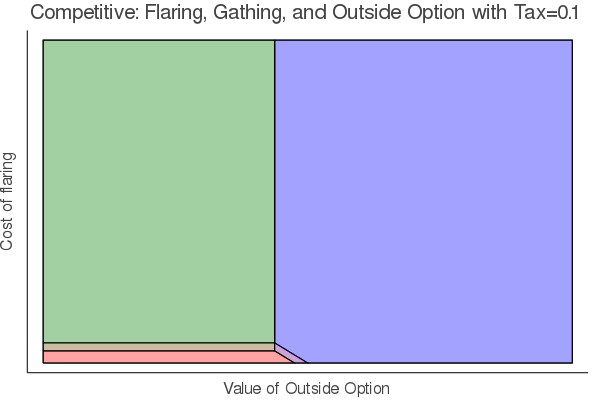

In [11]:
mc = FlaringModel(;monop=false)
mm = FlaringModel(;monop=true)

function PlotModel(m::FlaringModel, t0=0, t1=0.1)
    p = plot(; xticks=0, yticks=0, xlab="Value of Outside Option", ylab="Cost of flaring")
    plot!(p, GatherShape(m,t0); fillalpha=0.2, label="", fillcolor=:green)
    plot!(p, FlareShape( m,t0); fillalpha=0.2, label="", fillcolor=:red)
    plot!(p, AltOptShape(m,t0); fillalpha=0.2, label="", fillcolor=:blue)

    plot!(p, GatherShape(m,t1), fillalpha=0.2, label="", fillcolor=:green)
    plot!(p, FlareShape( m,t1), fillalpha=0.2, label="", fillcolor=:red)
    plot!(p, AltOptShape(m,t1), fillalpha=0.2, label="", fillcolor=:blue)
    return p
end

p = PlotModel(mc, 0, 0.1)
title!(p, "Competitive: Flaring, Gathing, and Outside Option with Tax=0.1")

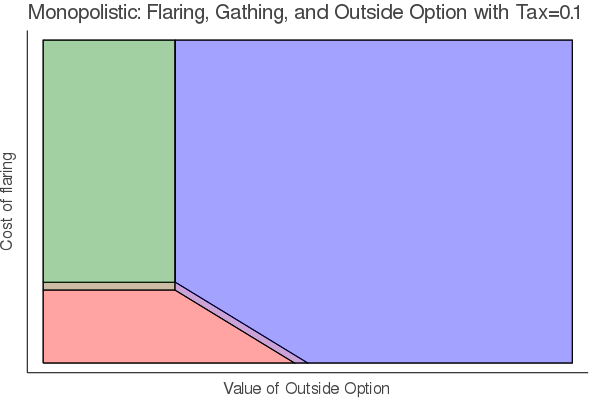

In [13]:
p = PlotModel(mm, 0, 0.1)
title!(p, "Monopolistic: Flaring, Gathing, and Outside Option with Tax=0.1")

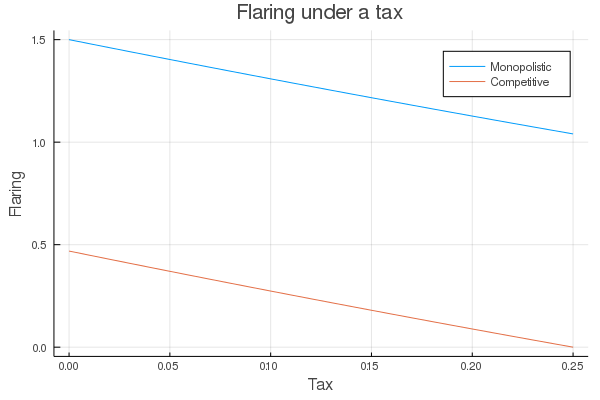

In [14]:
taxes = 0:0.01:0.25
plot(; title="Flaring under a tax", xlab="Tax", ylab="Flaring")
plot!(taxes, t -> Flare(mm, t), label="Monopolistic")
plot!(taxes, t -> Flare(mc, t), label="Competitive")

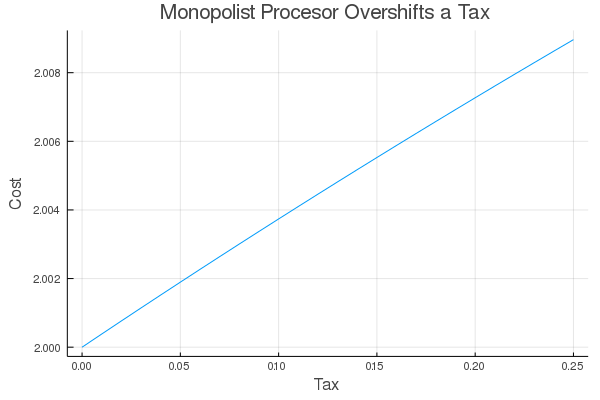

In [16]:
plot(; title="Monopolist Procesor Overshifts a Tax", xlab="Tax", ylab="Cost")
plot!(taxes, t -> Cost(mm, t), label="")